In [2]:
!pip install langchain openai langgraph langchain_openai langchain_core graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
import os,getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# _set_env("OPENAI_API_KEY")

os.environ["OPENAI_API_KEY"] = "open_api_key"

In [7]:
import datetime
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

def ShopOpeningHours() -> str:
  "This tool provides the daily operning hours schedule for shop"
  schedule = """Monday 10:00 to 18:00hrs
                Tuesday 10:00 to 18:00hrs
                Wednesday 10:00 to 18:00hrs
                Thrusday 10:00 to 18:00hrs
                Friday 10:00 to 18:00hrs
                Saturday 10:00 to 18:00hrs
                Sunday 10:00 to 18:00hrs"""
  return schedule

def CurrentTime() -> datetime:
  "This tool provides the current date and time"
  return datetime.datetime.now()

tools = [ShopOpeningHours, CurrentTime]


In [8]:
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage, HumanMessage

system_message = SystemMessage(content="You are a helpful assistant responsible for determining whether a shop is open or closed based on the current time and the shop's opening schdule.")

def assistant(state: MessagesState):
    return {"messages": [llm.invoke([system_message] + state["messages"])]}

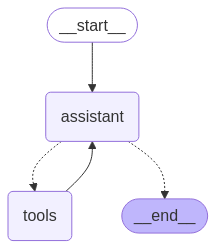

In [9]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

builder = StateGraph(MessagesState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition)
builder.add_edge("tools","assistant")

react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))


In [10]:
messages = [HumanMessage(content="Tell me if the shop is open right now?")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************C8YA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}